In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
# Use the correct key '.csv' to access the uploaded file
df= pd.read_csv(io.BytesIO(uploaded["LoanApprovalPrediction.csv"]), encoding='latin-1')

Saving LoanApprovalPrediction.csv to LoanApprovalPrediction.csv


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(598, 13)

In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [9]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any() | (df == '').any()]
# Print columns with missing values and the number of missing values
print(missing_columns)

Index(['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')


In [10]:
for column in missing_columns:
  nan_count = df[column].isnull().sum()
  empty_string_count = (df[column] == '').sum()
  print(f"Column: {column} -> NaNs: {nan_count}, Empty Strings: {empty_string_count}")

Column: Dependents -> NaNs: 12, Empty Strings: 0
Column: LoanAmount -> NaNs: 21, Empty Strings: 0
Column: Loan_Amount_Term -> NaNs: 14, Empty Strings: 0
Column: Credit_History -> NaNs: 49, Empty Strings: 0


In [11]:
# Fill NaN values with 0 in float type columns
df = df.apply(lambda col: col.fillna(0) if col.dtype == 'float64' else col)

In [12]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Numerical features -Analysis**

understanding the distribution of the numerical features

In [13]:
numerical_cols=df.select_dtypes(include='number').columns.tolist()

In [14]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.740803,5292.252508,1631.499866,139.877926,333.913043,0.774247
std,1.003198,5807.265364,2953.315785,85.514171,82.640708,0.418427
min,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,97.250000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,125.000000,360.000000,1.000000
75%,1.000000,5746.000000,2324.000000,163.500000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


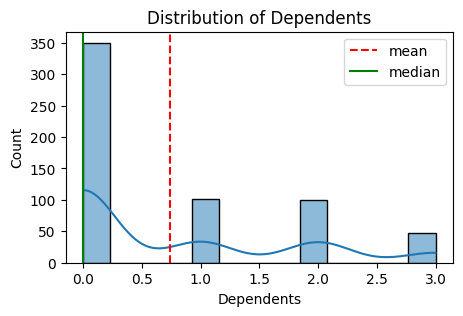

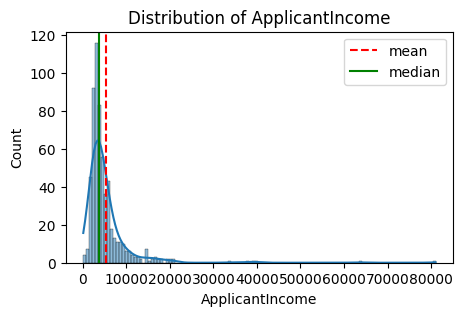

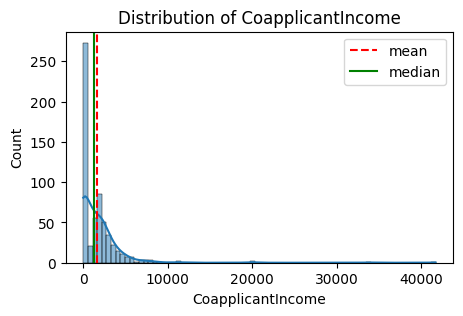

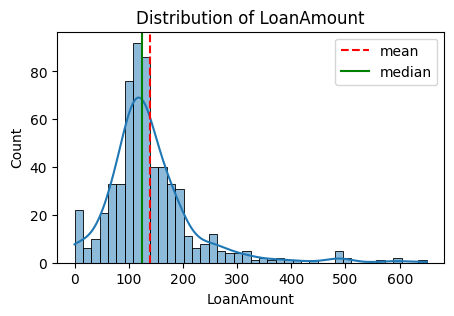

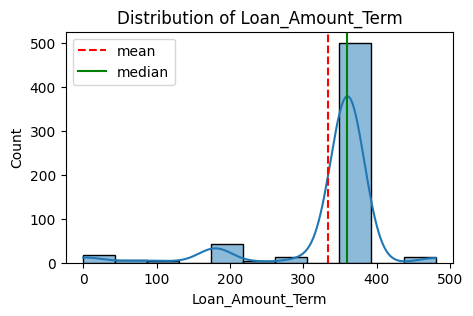

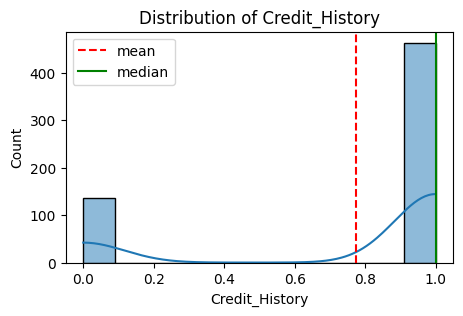

In [15]:
for col in numerical_cols:
     plt.figure(figsize=(5,3))
     sns.histplot(data=df,x=col,kde=True)
     plt.title(f'Distribution of {col}')


  # calculate mean and median values for the columns
     mean_value=df[col].mean()
     median_value=df[col].median()
  #add vertical line for the mean and median values.
     plt.axvline(mean_value,color='red',linestyle='--',label='mean')
     plt.axvline(median_value,color='green',linestyle='-',label='median')
     plt.legend()
     plt.show()

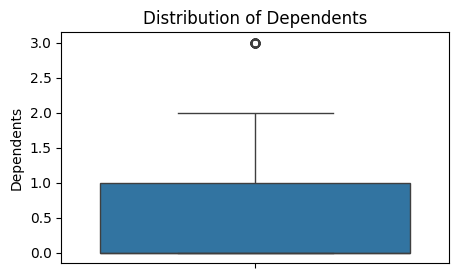

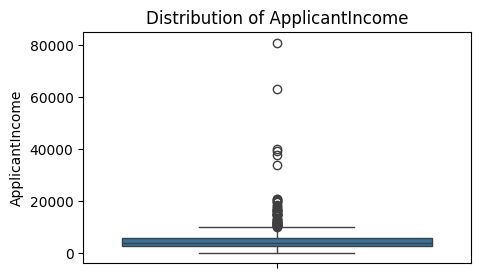

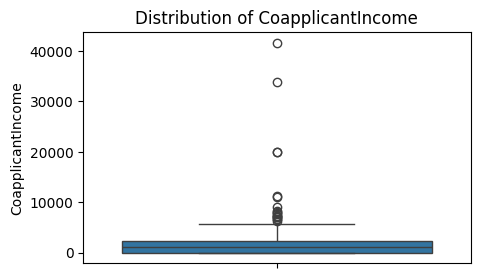

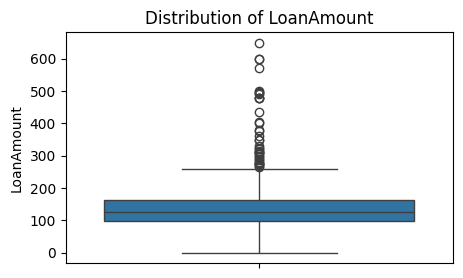

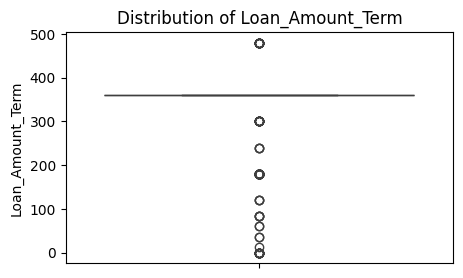

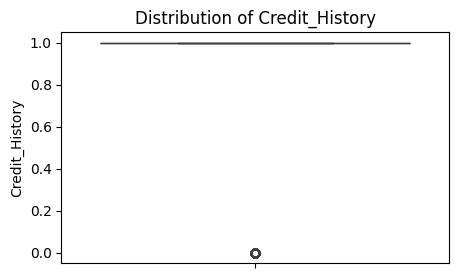

In [16]:
for col in numerical_cols:
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[col])
  plt.title(f'Distribution of {col}')

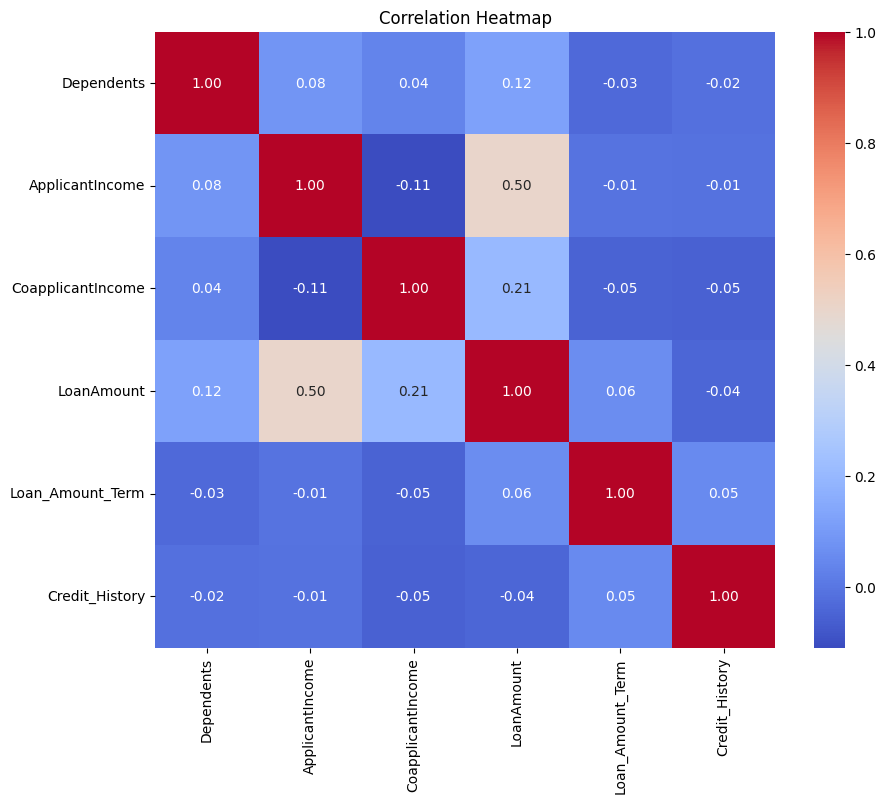

In [17]:
#correlation matrix -Heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Categorical feature-Analysis**



In [18]:
object_cols=df.select_dtypes(include='object').columns.tolist()
#we have to include seniorcitizen here
object_cols = [col for col in object_cols if col != 'Loan_ID' and col in df.columns] # Changed this line

Count plot for categorical columns

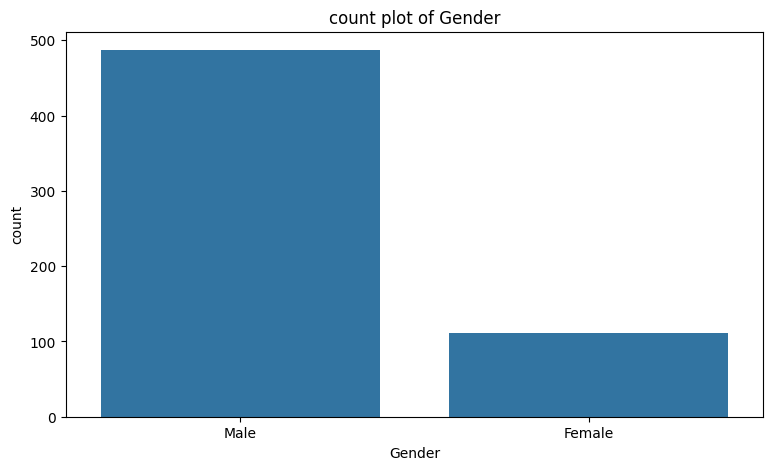

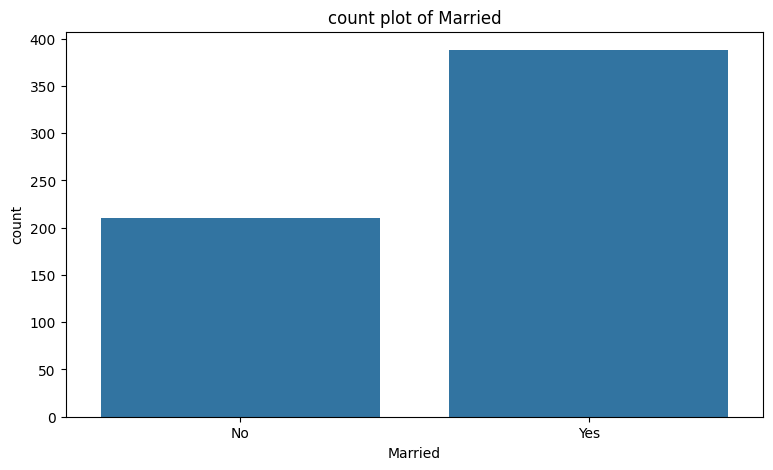

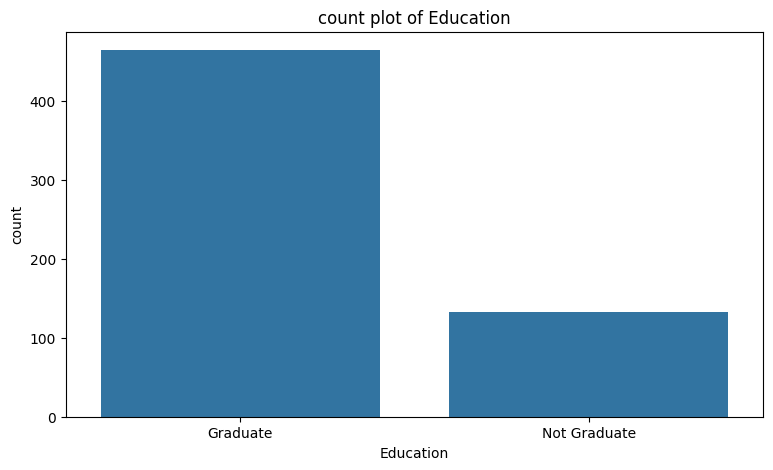

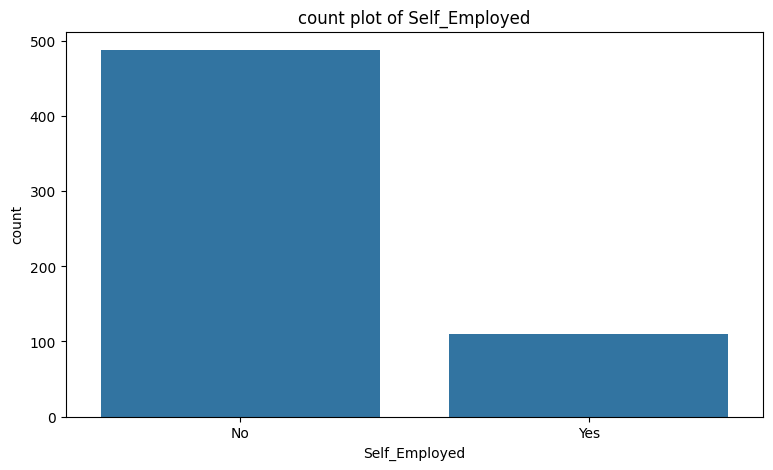

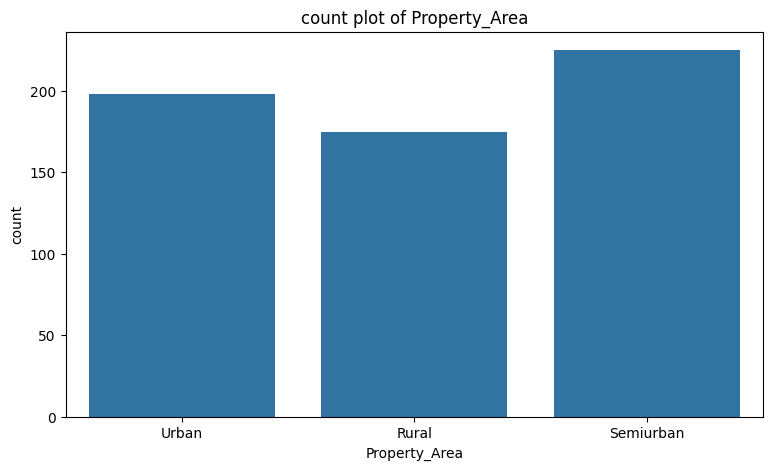

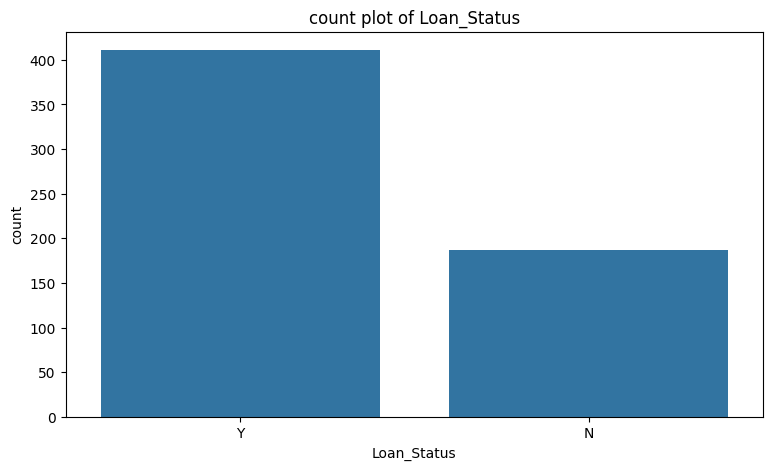

In [19]:
for col in object_cols:
  plt.figure(figsize=(9,5))
  sns.countplot(x=df[col])
  plt.title(f'count plot of {col}')
  plt.show()

In [20]:
encoded=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in encoded:
  if encoded[col].dtype=='object':
    encoded[col]=le.fit_transform(encoded[col])



In [21]:
encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [22]:
encoded=encoded.drop('Loan_ID',axis=1)

In [23]:
encoded.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Training and testing the data split

In [24]:
x=encoded.drop(['Loan_Status'],axis=1)
y=encoded['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(encoded)

In [27]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

**Model Evaluation**

In [28]:
#evaluate on the test data
y_pred=model.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score: 0.8
Confusion Matrix:
 [[17 18]
 [ 6 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59        35
           1       0.81      0.93      0.87        85

    accuracy                           0.80       120
   macro avg       0.78      0.71      0.73       120
weighted avg       0.79      0.80      0.79       120



In [29]:
#3. Create a DataFrame for new records
new_data = pd.DataFrame({
    'Gender': [1, 0, 1],  # Replace with your feature values
    'Married': [1, 0, 1],
    'Dependents': [0, 1, 2],
    'Education': [1, 0, 1],
    'Self_Employed': [0, 1, 0],
    'ApplicantIncome': [5000, 3000, 6000],
    'CoapplicantIncome': [1000, 0, 2000],
    'LoanAmount': [100, 50, 150],
    'Loan_Amount_Term': [360, 180, 300],
    'Credit_History': [1, 0, 1],
    'Property_Area': [0, 1, 2]
})

# Make predictions and add them to a new column
predictions = model.predict(new_data)
new_data['Prediction'] = predictions
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Prediction
0,1,1,0,1,0,5000,1000,100,360,1,0,1
1,0,0,1,0,1,3000,0,50,180,0,1,0
2,1,1,2,1,0,6000,2000,150,300,1,2,1
